### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
tf.random.set_seed(42)

In [18]:
tf.__version__

'2.0.0'

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [22]:
print(testY[0:5])

[9 2 1 1 6]


In [23]:
trainY

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
train_labels = tf.keras.utils.to_categorical(trainY, num_classes=10)
test_labels = tf.keras.utils.to_categorical(testY, num_classes=10)

In [25]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000,)
('First 5 examples now are: ', array([9, 0, 0, 3, 0], dtype=uint8))


In [26]:
print(trainX.shape)


(60000, 28, 28)


In [27]:
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

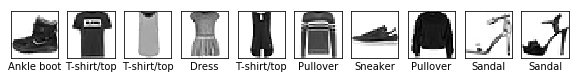

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
#BatchNormalization -- used to feed normalizing to model
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
#Creates 10 equations
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])
#If Sigmoid, give Binary_crossentropy

### Execute the model using model.fit()

In [31]:
model.fit(trainX, train_labels, 
          validation_data=(testX, test_labels), 
          epochs=100,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 29us/sample - loss: 2.3331 - accuracy: 0.2457 - val_loss: 17.2076 - val_accuracy: 0.1776
Epoch 2/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.0994 - accuracy: 0.2946 - val_loss: 10.6929 - val_accuracy: 0.2214
Epoch 3/100
60000/60000 [==============================] - 1s 21us/sample - loss: 1.9184 - accuracy: 0.3475 - val_loss: 7.8895 - val_accuracy: 0.2612
Epoch 4/100
60000/60000 [==============================] - 1s 22us/sample - loss: 1.7767 - accuracy: 0.3969 - val_loss: 6.2910 - val_accuracy: 0.2956
Epoch 5/100
60000/60000 [==============================] - 1s 22us/sample - loss: 1.6644 - accuracy: 0.4405 - val_loss: 5.2575 - val_accuracy: 0.3286
Epoch 6/100
60000/60000 [==============================] - 1s 22us/sample - loss: 1.5742 - accuracy: 0.4773 - val_loss: 4.5413 - val_accuracy: 0.3557
Epoch 7/100
60000/60000 [=======================

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


In [0]:
from keras.utils import normalize, to_categorical
X_train = normalize(trainX, axis=1)
X_test = normalize(testX, axis=1)

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
#BatchNormalization -- used to feed normalizing to model
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
#Creates 10 equations
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])
#If Sigmoid, give Binary_crossentropy

### Execute the model

In [35]:
model.fit(X_train, train_labels, 
          validation_data=(X_test, test_labels), 
          epochs=100,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 65us/sample - loss: 2.6666 - accuracy: 0.1207 - val_loss: 2.2795 - val_accuracy: 0.2060
Epoch 2/100
60000/60000 [==============================] - 2s 28us/sample - loss: 2.4655 - accuracy: 0.1569 - val_loss: 2.2545 - val_accuracy: 0.2153
Epoch 3/100
60000/60000 [==============================] - 2s 25us/sample - loss: 2.2944 - accuracy: 0.1989 - val_loss: 2.2318 - val_accuracy: 0.2274
Epoch 4/100
60000/60000 [==============================] - 1s 24us/sample - loss: 2.1484 - accuracy: 0.2429 - val_loss: 2.2110 - val_accuracy: 0.2429
Epoch 5/100
60000/60000 [==============================] - 1s 24us/sample - loss: 2.0233 - accuracy: 0.2889 - val_loss: 2.1920 - val_accuracy: 0.2571
Epoch 6/100
60000/60000 [==============================] - 1s 24us/sample - loss: 1.9153 - accuracy: 0.3305 - val_loss: 2.1746 - val_accuracy: 0.2699
Epoch 7/100
60000/60000 [=========================

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.001)
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [37]:
model.fit(X_train, train_labels, 
          validation_data=(X_test, test_labels), 
          epochs=100,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 36us/sample - loss: 0.7083 - accuracy: 0.7566 - val_loss: 1.6029 - val_accuracy: 0.6787
Epoch 2/100
60000/60000 [==============================] - 1s 25us/sample - loss: 0.7066 - accuracy: 0.7569 - val_loss: 1.5984 - val_accuracy: 0.6800
Epoch 3/100
60000/60000 [==============================] - 2s 25us/sample - loss: 0.7049 - accuracy: 0.7574 - val_loss: 1.5939 - val_accuracy: 0.6812
Epoch 4/100
60000/60000 [==============================] - 1s 25us/sample - loss: 0.7032 - accuracy: 0.7579 - val_loss: 1.5894 - val_accuracy: 0.6826
Epoch 5/100
60000/60000 [==============================] - 1s 24us/sample - loss: 0.7016 - accuracy: 0.7586 - val_loss: 1.5848 - val_accuracy: 0.6839
Epoch 6/100
60000/60000 [==============================] - 1s 25us/sample - loss: 0.7000 - accuracy: 0.7591 - val_loss: 1.5803 - val_accuracy: 0.6850
Epoch 7/100
60000/60000 [=========================

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
sgd = optimizers.SGD(lr=0.03)

In [0]:
#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Review model

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 23,196
Trainable params: 21,628
Non-trainable params: 1,568
______________________________________________

### Run the model

In [0]:
model.fit(X_train, train_labels, 
          validation_data=(X_test, test_labels), 
          epochs=100,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 45us/sample - loss: 2.6639 - accuracy: 0.1000 - val_loss: 2.6412 - val_accuracy: 0.1000
Epoch 2/100
60000/60000 [==============================] - 2s 29us/sample - loss: 2.6412 - accuracy: 0.1000 - val_loss: 2.6199 - val_accuracy: 0.1000
Epoch 3/100
60000/60000 [==============================] - 2s 29us/sample - loss: 2.6199 - accuracy: 0.1000 - val_loss: 2.5999 - val_accuracy: 0.1000
Epoch 4/100
60000/60000 [==============================] - 2s 28us/sample - loss: 2.5999 - accuracy: 0.1000 - val_loss: 2.5811 - val_accuracy: 0.1000
Epoch 5/100
60000/60000 [==============================] - 2s 28us/sample - loss: 2.5811 - accuracy: 0.1000 - val_loss: 2.5635 - val_accuracy: 0.1000
Epoch 6/100
60000/60000 [==============================] - 2s 30us/sample - loss: 2.5635 - accuracy: 0.1000 - val_loss: 2.5470 - val_accuracy: 0.1000
Epoch 7/100
60000/60000 [=========================